EE-311
======

Lab 3: logistic regression and gradient descent
----------------------------------------

created by Francois Marelli on 05.03.2020

# Import libraries

*The seaborn library is a high-level plotting library based on Matplotlib, used for statistical data visualization*

In [71]:
from sklearn.datasets import load_iris, load_wine
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data

For this lab, we will use the iris dataset (<https://en.wikipedia.org/wiki/Iris_flower_data_set>). It contains 100 samples representing different types of irises using 4 features (width and length of sepals and petals).

The original dataset contains 3 classes (types of irises), but we want to train a binary classifier. We will remove the last class for this session.

This time, we use `train_test_split` from `sklearn` to generate train and test subsets. As always, it is important to start with knowing the properties of the dataset we work on. Answer the following:

1. Is the dataset balanced? Yes it is
2. How about the train and test splits? The test split is a bit less balanced

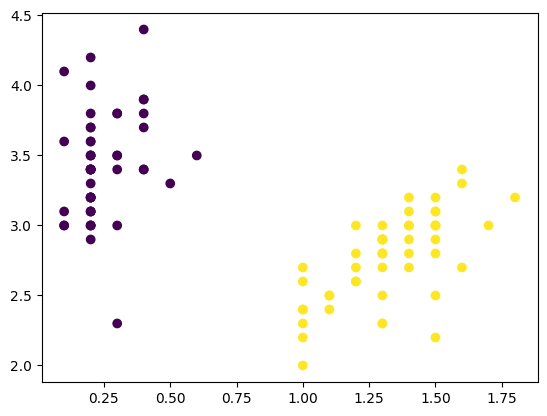

In [72]:
data_X, data_y = load_iris(return_X_y=True)

# Reduce the dataset to a binary problem
mask = (data_y == 0) | (data_y == 1)

data_X = data_X[mask]
data_y = data_y[mask]

# Split into train and test subsets randomly, using 15% for test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y,
                                                    test_size=0.15, random_state=0)


###############################################################
# Code here

# plot
#plt.scatter(X_train[:, 0], X_train[:, 3], c=y_train, cmap='viridis')
#plt.scatter(X_test[:, 3], X_test[:, 1], c=y_test, cmap='viridis')
plt.scatter(data_X[:, 3], data_X[:, 1], c=data_y, cmap='viridis')



# Some utility functions

We provide this function to easily plot the histograms of our dataset. We will use it throughout this lab.

In [73]:
def plot_density(dataset, labels):
    classes = (dataset[labels == 0], dataset[labels == 1])

    sns.displot(classes, fill=True, kind='kde')

    plt.title('Density of the classes')
    plt.xlabel('Data X')

# 1D binary classification

We want to be able to predict the class of a sample based on its features. This is a binary classification problem, and we will solve it using a logistic regression model.

Let us first consider only the first dimension of the data using `X[:, 0]`

From the density plot, try to guess if the logistic regression classifier will have a high accuracy.

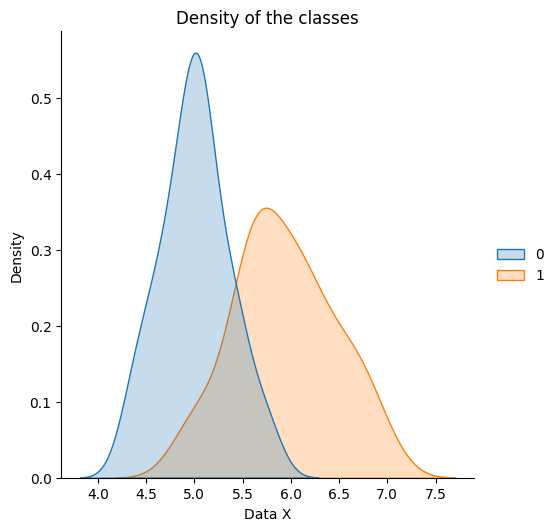

In [74]:
plot_density(data_X[:, 0], data_y)

## Train the classifier and check the performance

What is the performance score for a logistic regression model?

Implement it on your own and check that the results match.

In [75]:
X_train_1D = X_train[:, 0, np.newaxis]
X_test_1D = X_test[:, 0, np.newaxis]

classifier = LogisticRegression().fit(X_train_1D, y_train)

accuracy = classifier.score(X_test_1D, y_test)
print('Classification accuracy: {:.2f}%'.format(accuracy * 100))

############################################
# Code here to compute the accuracy

pred=classifier.predict(X_test_1D)
valid = y_test == pred
accuracy = valid.sum() / len(valid)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Classification accuracy: 93.33%
Accuracy: 93.33%


## What's happening inside?

Here is a plot of the class probabilities predicted by the model (obtained with `predict_proba`). It is what the model uses to make a decision between the two classes (note that the sum of the probabilities for both classes is always 1).

Code the equations of the logistic regression to reproduce the plot below using the parameters of the trained model. Use `plt.plot(x, y, '*')` for better readability. Remember that a logistic regression is just a linear regression on which we apply the logistic function!

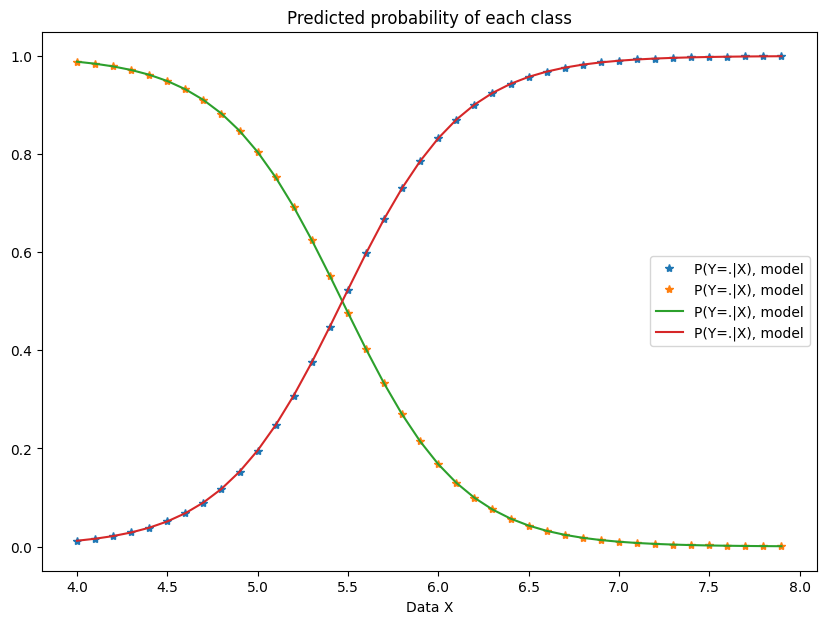

In [104]:
X_plot = np.arange(4, 8, 0.1)[..., np.newaxis]
proba = classifier.predict_proba(X_plot)

plt.figure(figsize=(10,7))

###################################################
# Add your code here!
def sigma(x):
    return 1/(1+np.exp(-x))
line1= classifier.coef_*X_plot + classifier.intercept_

plt.plot(X_plot, sigma(line1),'*', label='P(Y=.|X), model')
plt.plot(X_plot, 1-sigma(line1),'*', label='P(Y=.|X), model')




###################################################

plt.plot(X_plot, proba, label='P(Y=.|X), model')
plt.title('Predicted probability of each class')
plt.xlabel('Data X')
plt.legend()
plt.show()

## The decision boundary

The decision boundary of a model is the hypersurface that separates the two classes for decision making, the frontier at which the decision transitions from 0 to 1.

1. For a logistic regression, what specific type of hypersurface is the decision boundary? A plane

1. In this simple example, what is the decision boundary? A line

3. Compute and plot the decision boundary on the densities using `plt.axvline`. How do you interpret it? 

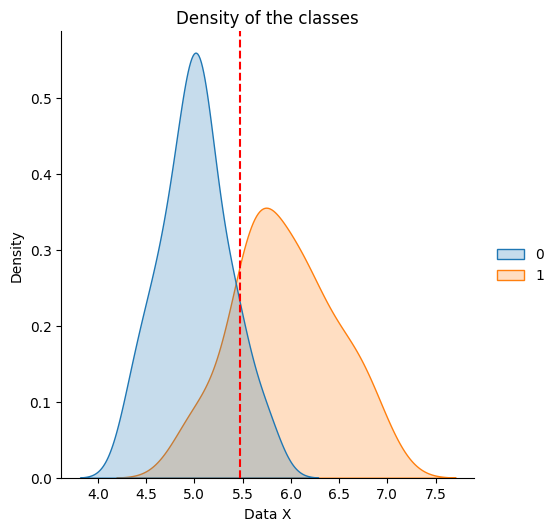

In [101]:
plot_density(data_X[:, 0], data_y)


##########################################################
# Add your code to compute and plot the decision boundary

p = 0.5
logit=np.log(p/(1-p))
boundary = (logit - classifier.intercept_)/classifier.coef_
plt.axvline(boundary, color='r', linestyle='--', label='Decision boundary')

plt.show()


## Other features of X

Let us now work on the second feature `X[:, 1]` instead (still a 1D problem).

1. Plot the histograms. Do you think the model is going to perform better than when trained on the first feature? Why?
Train the model and print the accuracy to check. No, the feature doesn't seem that much separable

2. How about the second feature `X[:, 2]`? Repeat the steps. Yes, the features seems very separable

In [113]:
# Time to code!

classifier1 = LogisticRegression().fit(data_X[:,1,np.newaxis], data_y)
classifier2 = LogisticRegression().fit(data_X[:,2,np.newaxis], data_y)

accuracy1 = classifier1.score(data_X[:,1,np.newaxis], data_y)
accuracy2 = classifier2.score(data_X[:,2,np.newaxis], data_y)

print('Classification accuracy for feature 1: {:.2f}%'.format(accuracy1 * 100))
print('Classification accuracy for feature 2: {:.2f}%'.format(accuracy2 * 100))



Classification accuracy for feature 1: 84.00%
Classification accuracy for feature 2: 100.00%


# 2D binary classification

We saw that the data are not perfectly separable when using either one the two first features, and that the logistic regression model could not achieve 100% accuracy. What if we use both simultaneously?

Here is a scatter plot of our dataset with 2 features.

1. What do you think about its separability? What performance should we expect for the classifier? It looks pretty good

2. In this case, what is the decision boundary going to be?

Train a logistic regression model on the 2D data, print its accuracy and plot its decision boundary on the scatter plot.

Classification accuracy: 100.00%
classifier coefficients: [[ 2.92382402 -2.82284157]] [-7.15850612]


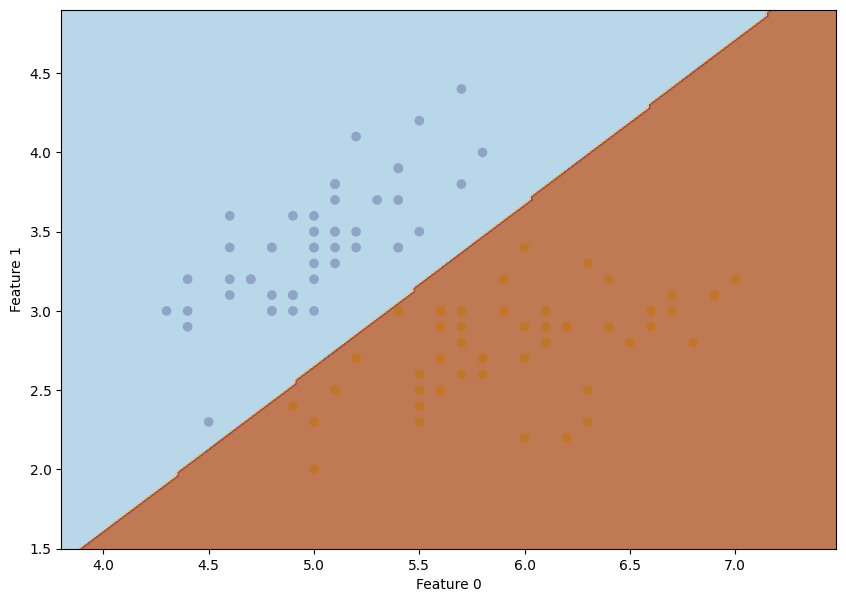

In [118]:
plt.figure(figsize=(10, 7))
plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Keep the 2 first features of the dataset
X_train_2D = X_train[:, 0:2]
X_test_2D = X_test[:, 0:2]

###############################################
# Here you go!

classifier = LogisticRegression().fit(X_train_2D, y_train)
accuracy = classifier.score(X_test_2D, y_test)
print('Classification accuracy: {:.2f}%'.format(accuracy * 100))
print('classifier coefficients:', classifier.coef_, classifier.intercept_)

# Plot the decision boundary
x_min, x_max = data_X[:, 0].min() - .5, data_X[:, 0].max() + .5
y_min, y_max = data_X[:, 1].min() - .5, data_X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

## Gradient descent

Last time, we have computed the analytical solution of the linear regression (with L2 loss) problem $y = \beta_0 + \beta_1 X$.

Even if we know the analytical solution of the problem, we could use a gradient descent method to compute it (for demonstration purposes).

The numerical result should closely match the analytical solution if done right.

Here is a plot of the loss function (L2) as a function of $\vec{\beta}$, and a skeleton code for the gradient descent algorithm.

Implement the derivative function and the model update so that the gradient descent converges to the minimum of the loss function. 
 
Hint: do not forget the importance of the step size!

1. Does it give the same result as the analytical method? 

2. What happens if you change the initial value of $\beta$ to be further away from the solution?

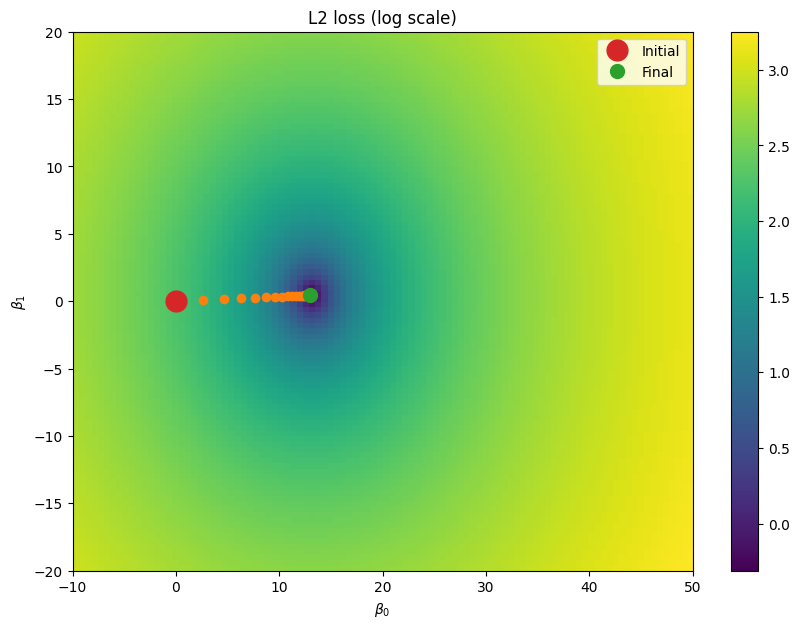

Numerical value of beta: [12.98452399  0.44175772]
Analytical value of beta: [13.00061798  0.44230526]


In [129]:
wine_full, _ = load_wine(return_X_y=True)
wine_X = wine_full[:, np.newaxis, 9]
wine_y = wine_full[:, 0]

# Normalization makes our life easier
wine_X = (wine_X - wine_X.mean(0)) / wine_X.std(0)

regr = LinearRegression().fit(wine_X, wine_y)

# Add a column of 1 to the data X
ones = np.ones((wine_X.shape[0], 1))
wine_X = np.concatenate([ones, wine_X], axis=1)

beta = np.array((regr.intercept_, regr.coef_[0]))


def loss_function(y_predict, y_true):
    return np.power(y_true - y_predict, 2).mean(0)


def derivative_function(y_predict, y_true, x):
    
    ###############################################
    # Code here to implement the derivative
    
    return -2 * (y_true - y_predict).dot(x) / len(y_true)
    

    ###############################################



# Compute and plot the loss function at every value of b
b0 = np.linspace(-10, 50, 100)
b1 = np.linspace(-20, 20, 100)

beta_range = np.stack(np.meshgrid(b0, b1), 1)
pred = wine_X.dot(beta_range)
loss_map = loss_function(pred, wine_y[:, np.newaxis, np.newaxis])

# Plotting in log scale for better readability
plt.figure(figsize=(10,7))
plt.imshow(np.log10(loss_map), extent=[b0[0], b0[-1], b1[0], b1[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('$\\beta_0$')
plt.ylabel('$\\beta_1$')
plt.title('L2 loss (log scale)')

# Initial value for b (arbitrary)
b = np.array([0, 0])

plt.plot(b[0], b[1], 'o', color='C3', markersize=15, label='Initial')


# Gradient descent algorithm
for _ in range(30):

    ##############################################################
    # Update the model here!
    # The choice of the stepsize is crucial to avoid oscillations
    
    b = b - 0.1 * derivative_function(wine_X.dot(b), wine_y, wine_X)
    
    
    

    ##############################################################

    # Plot the evolution
    plt.plot(b[0], b[1], 'o', color='C1')


plt.plot(b[0], b[1], 'o', color='C2', markersize=10, label='Final')
plt.legend()
plt.show()

print('Numerical value of beta:', b)
print('Analytical value of beta:', beta)